In [2]:
import pandas as pd
from pickle import load
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
import numpy as np
from statsmodels.tsa.stattools import adfuller
from scipy.signal import correlate
from scipy import signal
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import coint
from jsondataset import files_in_directory
from tqdm import tqdm
tqdm.pandas()

In [3]:
file_list, _ = files_in_directory('cleaned_tweetsv3')
df_tweets = pd.DataFrame(columns = ['date', 'content', 'user', 'hashtags', 'coordinates', 'product',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'place',
       'just_date', 'nltk_texts'])
for file in tqdm(file_list):
    if file[-4:] =='.csv':
        df_new = pd.read_csv(file, low_memory=False, lineterminator='\n')
        df_tweets = pd.concat([df_tweets, df_new])


 56%|█████▌    | 6866/12226 [2:40:10<2:05:02,  1.40s/it] 


KeyboardInterrupt: 

In [19]:
#clever sizing for lemmatizer
size = len(file_list)
limit= 1000

if size < limit:
    split = size
    times =1
else:
    times = int(np.ceil(size/limit))
print("loop will run ", times, " times")
count = 1
df_tweets = pd.DataFrame(columns = ['date', 'content', 'user', 'hashtags', 'coordinates', 'product',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'place',
       'just_date', 'nltk_texts'])

for i in tqdm(range(12000,len(file_list))):  #len(file_list-1)
    file = file_list[i]
    if file[-4:] == '.csv':
        df_new = pd.read_csv(file, low_memory=False, lineterminator='\n')
        df_tweets = pd.concat([df_tweets, df_new])
    if i%1000 ==0:
        continue
        df_tweets.to_csv(f'/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/tweets extracted/tweets_cleanedv3.{i}')
        df_tweets = pd.DataFrame(columns = ['date', 'content', 'user', 'hashtags', 'coordinates', 'product',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'place',
       'just_date', 'nltk_texts'])
    elif i == (len(file_list)):
        df_tweets.to_csv(f'/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/tweets extracted/tweets_cleanedv3.{i}')



loop will run  13  times


100%|██████████| 226/226 [00:16<00:00, 14.11it/s]


In [22]:
df_tweets.to_csv(f'/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/tweets_extracted/tweets_cleanedv3.12226.csv')

In [ ]:
df_tweets = pd.read_csv('tweets_cleanedv3.csv', low_memory=False, lineterminator='\n')
df_tweets.head()

In [5]:
#df_tweets.to_csv('tweets_cleanedv2.csv', index=False)

In [6]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051001 entries, 0 to 1051000
Data columns (total 13 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   date          1051001 non-null  object 
 1   content       1050987 non-null  object 
 2   user          1051001 non-null  object 
 3   hashtags      1051001 non-null  object 
 4   coordinates   1051001 non-null  object 
 5   product       1051001 non-null  object 
 6   replyCount    1051001 non-null  float64
 7   retweetCount  1051001 non-null  float64
 8   likeCount     1051001 non-null  float64
 9   quoteCount    1051001 non-null  float64
 10  place         1051001 non-null  object 
 11  just_date     1051001 non-null  object 
 12  nltk_texts    1051001 non-null  object 
dtypes: float64(4), object(9)
memory usage: 104.2+ MB


In [7]:
df_tweets.content.astype(str)

0                            jackbloodworth fraud rob living
1                         listen penknifelovelife be myspace
2          nocellara olives white wine rem m win virtualp...
3          peterborough pufc ' believe jack bloodworth st...
4                 one good line ever " ' scrotum " thebridge
                                 ...                        
1050996               briancooksonuci guy think cyclingruine
1050997    chrisbrown feel good christmas black family mo...
1050998           year old promote donkey mary today waytogo
1050999    take minute appreciate natural beauty lisamacd...
1051000    mistletoe seasonal date rape bush parasite chr...
Name: content, Length: 1051001, dtype: object

In [8]:
X_tweets = df_tweets.content.astype(str).array

In [9]:
loaded_model = load(open('/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/Training/finalized_model.sav', 'rb'))

In [10]:
y_tweets = loaded_model.predict(X_tweets)
y_prob = loaded_model.predict_proba(X_tweets)

In [11]:
y_tweets

array(['neg', 'neut', 'pos', ..., 'neut', 'pos', 'neut'], dtype='<U4')

In [23]:
df_tweets['pred_sentiment'] = y_tweets

In [24]:
df_tweets.groupby('pred_sentiment').count()

,date,content,user,hashtags,coordinates,product,replyCount,retweetCount,likeCount,quoteCount,place,just_date,nltk_texts
pred_sentiment,,,,,,,,,,,,,
neg,294688,294674,294688,294688,294688,294688,294688,294688,294688,294688,294688,294688,294688
neut,538685,538685,538685,538685,538685,538685,538685,538685,538685,538685,538685,538685,538685
pos,217628,217628,217628,217628,217628,217628,217628,217628,217628,217628,217628,217628,217628


In [25]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051001 entries, 0 to 1051000
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            1051001 non-null  object 
 1   content         1050987 non-null  object 
 2   user            1051001 non-null  object 
 3   hashtags        1051001 non-null  object 
 4   coordinates     1051001 non-null  object 
 5   product         1051001 non-null  object 
 6   replyCount      1051001 non-null  float64
 7   retweetCount    1051001 non-null  float64
 8   likeCount       1051001 non-null  float64
 9   quoteCount      1051001 non-null  float64
 10  place           1051001 non-null  object 
 11  just_date       1051001 non-null  object 
 12  nltk_texts      1051001 non-null  object 
 13  pred_sentiment  1051001 non-null  object 
dtypes: float64(4), object(10)
memory usage: 112.3+ MB


In [26]:
df_tweets.groupby('pred_sentiment').count()

,date,content,user,hashtags,coordinates,product,replyCount,retweetCount,likeCount,quoteCount,place,just_date,nltk_texts
pred_sentiment,,,,,,,,,,,,,
neg,294688,294674,294688,294688,294688,294688,294688,294688,294688,294688,294688,294688,294688
neut,538685,538685,538685,538685,538685,538685,538685,538685,538685,538685,538685,538685,538685
pos,217628,217628,217628,217628,217628,217628,217628,217628,217628,217628,217628,217628,217628


In [27]:
df_senti = df_tweets.groupby(['just_date', 'pred_sentiment']).agg({'date': ['count']})['date']
df_senti.columns = ['count']
df_senti = df_senti.reset_index()
df_senti = df_senti.pivot_table('count', ['just_date'], 'pred_sentiment')

In [28]:
df_senti

pred_sentiment,neg,neut,pos
just_date,,,
2010-12-31,2.0,2.0,NaN
2011-01-01,22.0,26.0,5.0
2011-01-02,22.0,26.0,15.0
2011-01-03,23.0,44.0,9.0
2011-01-04,24.0,33.0,5.0
...,...,...,...
2022-07-28,47.0,159.0,63.0
2022-07-29,39.0,129.0,65.0
2022-07-30,36.0,129.0,56.0


<AxesSubplot:xlabel='just_date'>

<Figure size 432x288 with 0 Axes>

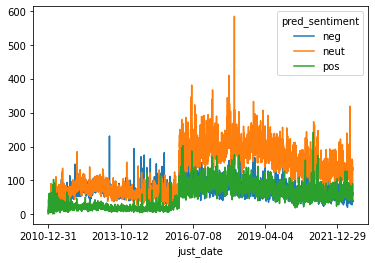

In [29]:
plt.figure()
df_senti.plot()

In [30]:
df_senti['sentiment_score'] = (df_senti['pos']- df_senti['neg'])/(df_senti['pos']+df_senti['neut']+df_senti['neg'])

<AxesSubplot:xlabel='just_date'>

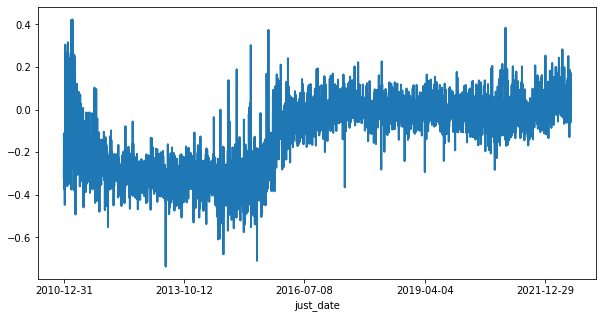

In [31]:
df_senti.sentiment_score.plot(linewidth=2.0, figsize=(10, 5))

In [32]:
df_senti.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4216 entries, 2010-12-31 to 2022-08-01
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   neg              4216 non-null   float64
 1   neut             4216 non-null   float64
 2   pos              4215 non-null   float64
 3   sentiment_score  4215 non-null   float64
dtypes: float64(4)
memory usage: 164.7+ KB


In [33]:
df_senti.index = pd.to_datetime((df_senti.index))
df_senti_monthly = df_senti.resample(rule='M').sum()

In [34]:
df_senti_monthly.to_csv('senti.csv')

In [35]:
df_senti_monthly['sentiment_score'] = (df_senti_monthly['pos']- df_senti_monthly['neg'])/(df_senti_monthly['pos']+df_senti_monthly['neut']+df_senti_monthly['neg'])

In [36]:
df_senti_monthly

pred_sentiment,neg,neut,pos,sentiment_score
just_date,,,,
2010-12-31,2.0,2.0,0.0,-0.500000
2011-01-31,877.0,965.0,655.0,-0.088907
2011-02-28,733.0,857.0,588.0,-0.066575
2011-03-31,1054.0,1288.0,1166.0,0.031927
2011-04-30,1159.0,1470.0,751.0,-0.120710
...,...,...,...,...
2022-04-30,1726.0,3725.0,2412.0,0.087244
2022-05-31,1666.0,4381.0,2157.0,0.059849
2022-06-30,1580.0,4147.0,1958.0,0.049187


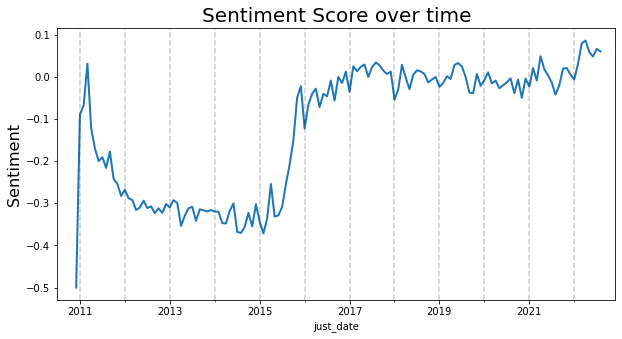

In [37]:
df_senti_monthly.sentiment_score.plot(linewidth=2.0, figsize=(10, 5))
plt.title('Sentiment Score over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
plt.xlim([datetime(2010, 7, 31),datetime(2022, 12, 31)])
for year in range(2011,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

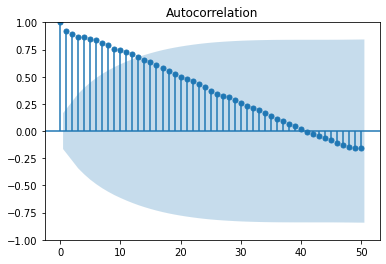

In [39]:
acf_plot = plot_acf(df_senti_monthly.sentiment_score, lags=50)

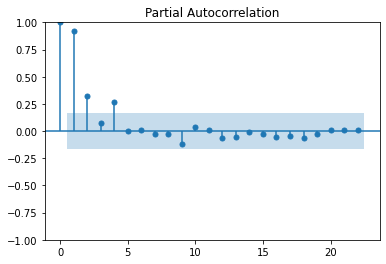

In [40]:
pacf_plot = plot_pacf(df_senti_monthly.sentiment_score, method='ywm')

In [41]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [42]:
perform_adf_test(df_senti_monthly.sentiment_score)

ADF Statistic: -0.531532
p-value: 0.885715


In [43]:
#take first difference
first_diffs = df_senti_monthly.sentiment_score.values[1:] - df_senti_monthly.sentiment_score[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [44]:
df_senti_monthly['first_diff'] =first_diffs

In [45]:
df_senti_monthly.head()

pred_sentiment,neg,neut,pos,sentiment_score,first_diff
just_date,,,,,
2010-12-31,2.0,2.0,0.0,-0.500000,0.411093
2011-01-31,877.0,965.0,655.0,-0.088907,0.022332
2011-02-28,733.0,857.0,588.0,-0.066575,0.098502
2011-03-31,1054.0,1288.0,1166.0,0.031927,-0.152637
2011-04-30,1159.0,1470.0,751.0,-0.120710,-0.048634


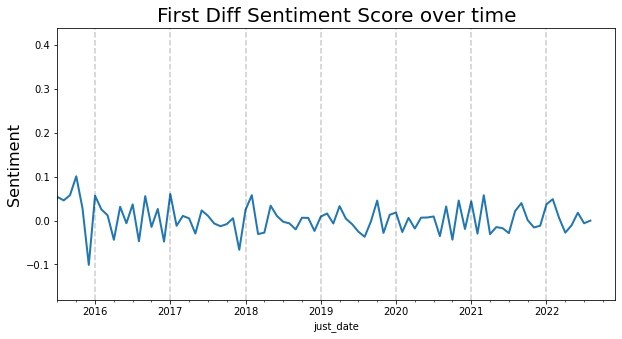

In [46]:
df_senti_monthly.first_diff.plot(linewidth=2.0, figsize=(10, 5))
plt.title('First Diff Sentiment Score over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
plt.xlim([datetime(2015, 7, 31),datetime(2022, 12, 31)])
for year in range(2011,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [47]:
perform_adf_test(df_senti_monthly.first_diff)

ADF Statistic: -7.172867
p-value: 0.000000


In [148]:
df_published = pd.read_csv('GfK Consumer Confidence.csv', parse_dates=['Date'], infer_datetime_format=True)

In [150]:
df_published.head()

,Date,Actual
0,2009-10-30,-13
1,2009-11-30,-17
2,2009-12-18,-19
3,2010-01-29,-17
4,2010-02-26,-14


In [151]:
df_published.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    162 non-null    datetime64[ns]
 1   Actual  162 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.7 KB


In [129]:
#df_pub_gb = df_published.loc[df_published['LOCATION'].str.contains('GB')]
#df_pub_gb

In [130]:
#date_pub = df_pub_gb.rename(columns={'TIME':'date'})
#date_pub.drop(columns=['LOCATION','INDICATOR','SUBJECT','MEASURE','FREQUENCY', 'Flag Codes' ], inplace=True )

In [131]:
#df_published.date =pd.to_datetime(date_pub['date'])

In [152]:
df_published=df_published.set_index(['Date'])

In [153]:
df_published

,Actual
Date,
2009-10-30,-13
2009-11-30,-17
2009-12-18,-19
2010-01-29,-17
2010-02-26,-14
...,...
2022-04-22,-38
2022-05-20,-40
2022-06-24,-41


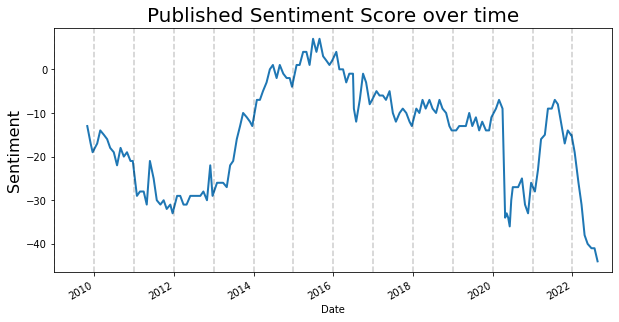

In [156]:
df_published.Actual.plot(linewidth=2.0, figsize=(10, 5))
plt.title('Published Sentiment Score over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
plt.xlim([datetime(2008, 12, 31),datetime(2022, 12, 31)])
for year in range(1973,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [157]:
perform_adf_test(df_published.Actual)

ADF Statistic: -1.264671
p-value: 0.645176


In [158]:
date_pub_now = df_published.loc['2010-12-01':'2022-06-30']

In [160]:
perform_adf_test(date_pub_now.Actual)

ADF Statistic: -1.347817
p-value: 0.607022


In [162]:
#take first difference
first_diffs = date_pub_now.Actual.values[1:] - date_pub_now.Actual[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [163]:
date_pub_now= date_pub_now.assign(first_diffs=first_diffs)

In [164]:
perform_adf_test(date_pub_now.first_diffs)

ADF Statistic: -12.627633
p-value: 0.000000


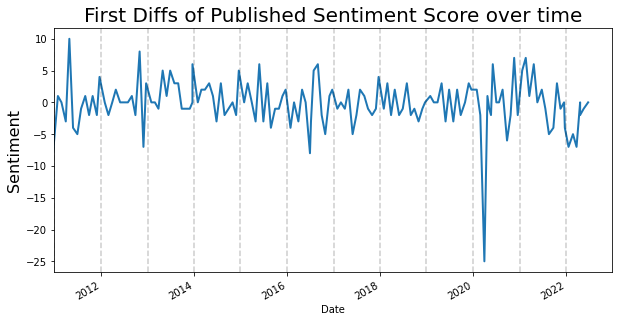

In [165]:
date_pub_now.first_diffs.plot(linewidth=2.0, figsize=(10, 5))
plt.title('First Diffs of Published Sentiment Score over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
plt.xlim([datetime(2010, 12, 31),datetime(2022, 12, 31)])
for year in range(1973,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [166]:
sent1_tw = df_senti_monthly.first_diff.array

In [167]:
sent1_pub = date_pub_now.Actual.array

In [168]:
corr = signal.correlate(sent1_tw, sent1_pub, mode='same')

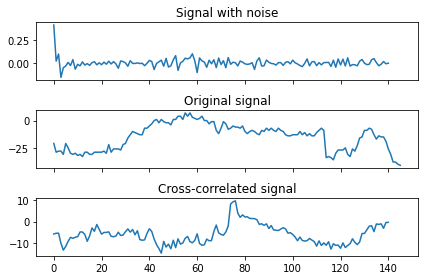

In [169]:
fig, (ax_sent1_tw, ax_sent1_pub, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_sent1_pub.plot(sent1_pub)
ax_sent1_pub.set_title('Original signal')
ax_sent1_tw.plot(sent1_tw)
ax_sent1_tw.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.set_title('Cross-correlated signal')
fig.tight_layout()
plt.show()

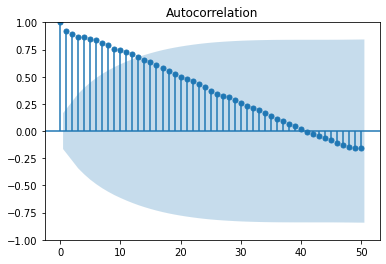

In [170]:
acf_plot = plot_acf(df_senti_monthly.sentiment_score, lags=50)

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


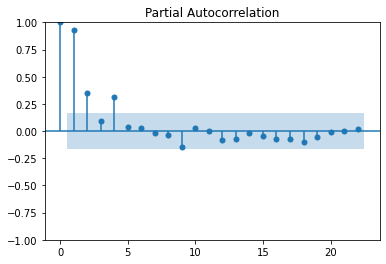

In [171]:
pacf_plot = plot_pacf(df_senti_monthly.sentiment_score)

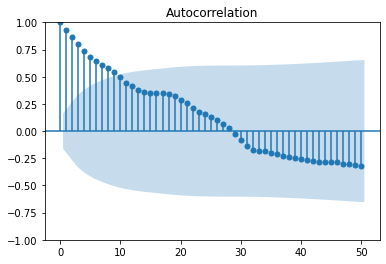

In [173]:
acf_plot = plot_acf(date_pub_now.Actual, lags=50)

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


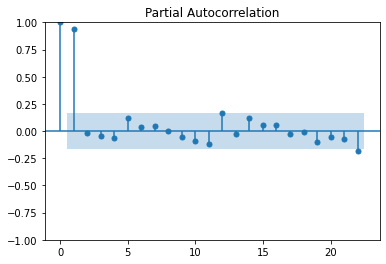

In [174]:
pacf_plot = plot_pacf(date_pub_now.Actual)

In [175]:
df_ar_senti = df_senti_monthly['sentiment_score']

In [176]:
df_ar_senti = df_ar_senti

In [177]:
df_ar_senti

just_date
2010-12-31   -0.500000
2011-01-31   -0.088907
2011-02-28   -0.066575
2011-03-31    0.031927
2011-04-30   -0.120710
                ...   
2022-04-30    0.087244
2022-05-31    0.059849
2022-06-30    0.049187
2022-07-31    0.067169
2022-08-31    0.061111
Freq: M, Name: sentiment_score, Length: 141, dtype: float64

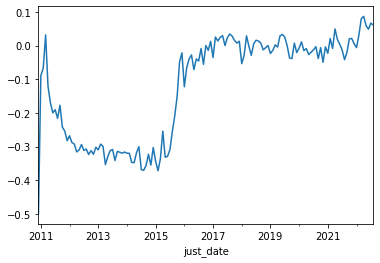

In [178]:
df_ar_senti.plot()
plt.show()

In [179]:
#infer frequency of the data
df_ar_senti = df_ar_senti.asfreq(pd.infer_freq((df_senti_monthly.index)))

In [180]:
train_end = datetime(2020,12,31)
test_end = datetime(2022,7, 31)

train_data = df_ar_senti[:train_end]
test_data = df_ar_senti[train_end + timedelta(days=1):test_end]

In [181]:
#create model
model = ARIMA(train_data, order=(2,1,0))

In [182]:
model_fit = model.fit()

In [183]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        sentiment_score   No. Observations:                  121
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 185.024
Date:                Mon, 22 Aug 2022   AIC                           -364.048
Time:                        16:47:13   BIC                           -355.686
Sample:                    12-31-2010   HQIC                          -360.652
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1110      0.062     -1.800      0.072      -0.232       0.010
ar.L2          0.1733      0.105      1.650      0.099      -0.033       0.379
sigma2         0.0027      0.000     19.397      0.0

In [184]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [185]:
predictions = model_fit.predict(start=pred_start_date, end = pred_end_date)
residuals = test_data-predictions

In [186]:
'''plt.figure(figsize=(10,5))
plt.plot(residuals)
plt.title('Residuals odf AR(2) model', fontsize=20)
plt.ylabel('Residuals', fontsize=16)
#plt.xlim([datetime.date(2015, 12, 31),datetime.date(2022, 12, 31)])
for year in range(2022,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)'''

"plt.figure(figsize=(10,5))\nplt.plot(residuals)\nplt.title('Residuals odf AR(2) model', fontsize=20)\nplt.ylabel('Residuals', fontsize=16)\n#plt.xlim([datetime.date(2015, 12, 31),datetime.date(2022, 12, 31)])\nfor year in range(2022,2023):\n    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)"

In [187]:
'''plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Sentiment over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
for year in range(2022,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)'''

"plt.figure(figsize=(10,4))\nplt.plot(test_data)\nplt.plot(predictions)\nplt.legend(('Data', 'Predictions'), fontsize=16)\nplt.title('Sentiment over time', fontsize=20)\nplt.ylabel('Sentiment', fontsize=16)\nfor year in range(2022,2023):\n    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)"

In [188]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 1.1407


In [189]:
print('Root Mean Squared Error', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error 0.04621378406450986


In [190]:
predictions_rolling = pd.Series(dtype='float64')
for end_date in test_data.index:
    train_data= df_ar_senti[:end_date-timedelta(days=30)]
    model = ARIMA(train_data, order=(2,1,0))
    model_fit = model.fit()
    pred = model_fit.predict(end_date)
    predictions_rolling.loc[end_date] = pred.loc[end_date]

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [191]:
residuals_rolling = test_data-predictions_rolling

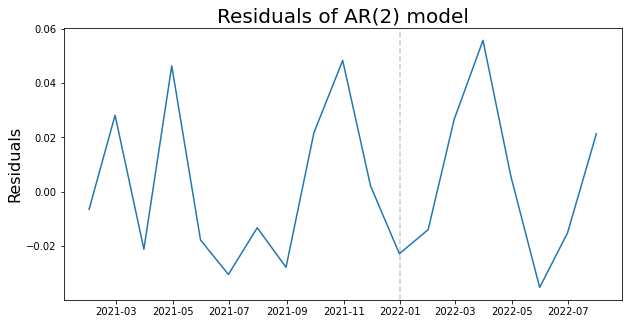

In [192]:
plt.figure(figsize=(10,5))
plt.plot(residuals_rolling)
plt.title('Residuals of AR(2) model', fontsize=20)
plt.ylabel('Residuals', fontsize=16)
#plt.xlim([datetime.date(2015, 12, 31),datetime.date(2022, 12, 31)])
for year in range(2022,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

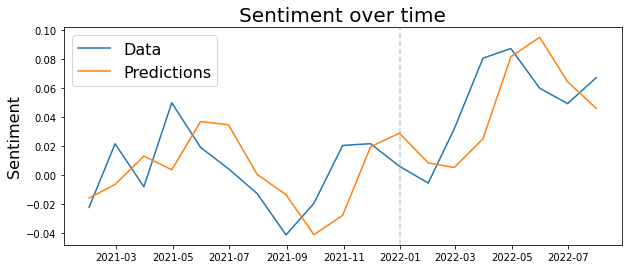

In [193]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions_rolling)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Sentiment over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
for year in range(2022,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [194]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling/test_data)),4))

Mean Absolute Percent Error: 1.4526


In [195]:
print('Root Mean Squared Error', np.sqrt(np.mean(residuals_rolling**2)))

Root Mean Squared Error 0.027988113242365047


In [196]:
df_ar_pub = date_pub_now['Actual']

In [197]:
df_ar_pub  = df_ar_pub.resample('M').last()

In [198]:
df_ar_pub

Date
2010-12-31   -21
2011-01-31   -29
2011-02-28   -28
2011-03-31   -28
2011-04-30   -31
              ..
2022-02-28   -26
2022-03-31   -31
2022-04-30   -38
2022-05-31   -40
2022-06-30   -41
Freq: M, Name: Actual, Length: 139, dtype: int64

In [199]:
df_ar_pub = df_ar_pub
#infer frequency of the data
df_ar_pub = df_ar_pub.asfreq(pd.infer_freq((df_ar_pub.index)))


In [200]:
train_end = datetime(2020, 12, 31)
test_end = datetime(2022, 5, 31)

train_data = df_ar_pub[:train_end]
test_data = df_ar_pub[train_end + timedelta(days=1):test_end]
#create model
model = ARIMA(train_data, order=(2, 0, 0))
model_fit = model.fit()
print(model_fit.summary())
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions


                               SARIMAX Results                                
Dep. Variable:                 Actual   No. Observations:                  121
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -334.217
Date:                Mon, 22 Aug 2022   AIC                            676.434
Time:                        16:48:01   BIC                            687.617
Sample:                    12-31-2010   HQIC                           680.976
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.3309      8.173     -1.998      0.046     -32.349      -0.312
ar.L1          0.8296      0.099      8.344      0.000       0.635       1.024
ar.L2          0.1202      0.101      1.196      0.2

In [201]:
'''plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals odf AR(2) model', fontsize=20)
plt.ylabel('Residuals', fontsize=16)
#plt.xlim([datetime.date(2015, 12, 31),datetime.date(2022, 12, 31)])
for year in range(2022, 2023):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha=0.2)'''

"plt.figure(figsize=(10, 5))\nplt.plot(residuals)\nplt.title('Residuals odf AR(2) model', fontsize=20)\nplt.ylabel('Residuals', fontsize=16)\n#plt.xlim([datetime.date(2015, 12, 31),datetime.date(2022, 12, 31)])\nfor year in range(2022, 2023):\n    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha=0.2)"

In [202]:
'''plt.figure(figsize=(10, 4))
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Sentiment over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
for year in range(2022, 2023):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha=0.2)'''

"plt.figure(figsize=(10, 4))\nplt.plot(test_data)\nplt.plot(predictions)\nplt.legend(('Data', 'Predictions'), fontsize=16)\nplt.title('Sentiment over time', fontsize=20)\nplt.ylabel('Sentiment', fontsize=16)\nfor year in range(2022, 2023):\n    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha=0.2)"

In [203]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals / test_data)), 4))
print('Root Mean Squared Error', np.sqrt(np.mean(residuals ** 2)))

Mean Absolute Percent Error: 0.7646
Root Mean Squared Error 11.4264548331585


In [204]:
predictions_rolling = pd.Series(dtype='float64')
for end_date in test_data.index:
    train_data = df_ar_pub[:end_date - timedelta(days=30)]
    model = ARIMA(train_data, order=(2, 0, 0))
    model_fit = model.fit()
    pred = model_fit.predict(end_date)
    predictions_rolling.loc[end_date] = pred.loc[end_date]
residuals_rolling = test_data - predictions_rolling

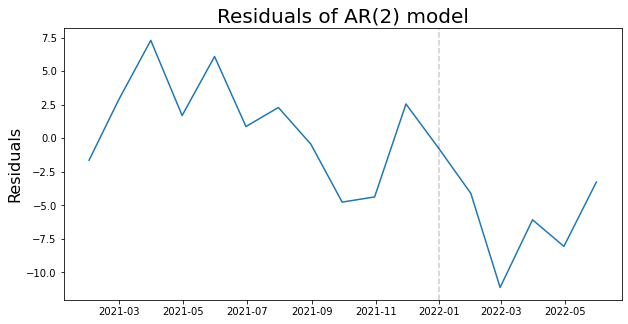

In [205]:
plt.figure(figsize=(10,5))
plt.plot(residuals_rolling)
plt.title('Residuals of AR(2) model', fontsize=20)
plt.ylabel('Residuals', fontsize=16)
#plt.xlim([datetime.date(2015, 12, 31),datetime.date(2022, 12, 31)])
for year in range(2022,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

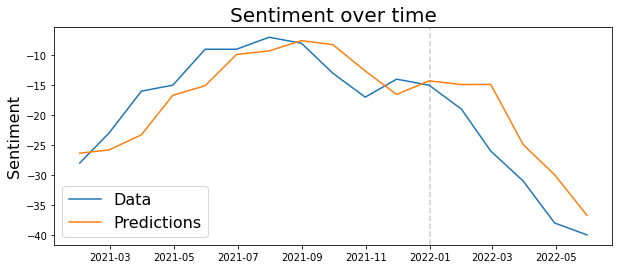

In [206]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions_rolling)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Sentiment over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
for year in range(2022,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [207]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling / test_data)), 4))
print('Root Mean Squared Error', np.sqrt(np.mean(residuals_rolling ** 2)))

Mean Absolute Percent Error: 0.229
Root Mean Squared Error 4.922391849870493


In [208]:
predictions_rolling_tw = pd.Series(dtype='float64')
times = len(df_ar_senti.index)
for i in range(10,times-1):
    date = df_ar_senti.index[i]
    #print(date)
    train_data = df_ar_senti[:date - timedelta(days=1)]
    #print(train_data)
    model_tw = ARIMA(train_data, order=(2, 1, 0))
    model_fit_tw = model_tw.fit()
    pred_tw = model_fit_tw.predict(date)
    predictions_rolling_tw.loc[date] = pred_tw.loc[date]
residuals_rolling_tw = df_ar_senti - predictions_rolling_tw

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/statsmodels/base/model.py:

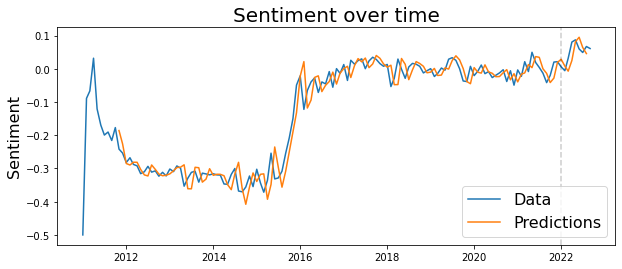

In [209]:
plt.figure(figsize=(10,4))
plt.plot(df_ar_senti)
plt.plot(predictions_rolling_tw)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Sentiment over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
for year in range(2022,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

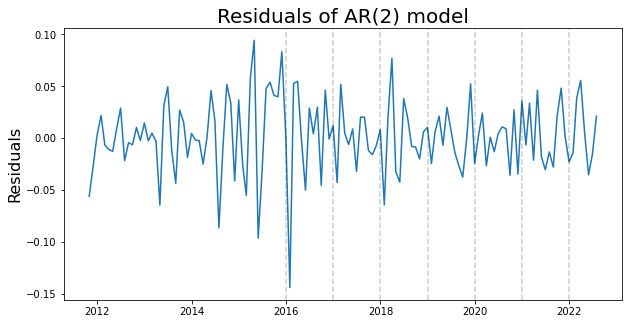

In [210]:
plt.figure(figsize=(10,5))
plt.plot(residuals_rolling_tw)
plt.title('Residuals of AR(2) model', fontsize=20)
plt.ylabel('Residuals', fontsize=16)
#plt.xlim([datetime.date(2015, 12, 31),datetime.date(2022, 12, 31)])
for year in range(2016,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [211]:
predictions_rolling_pub = pd.Series(dtype='float64')
times = len(df_ar_pub.index)
for i in range(10,times-1):
    date = df_ar_pub.index[i]
    #print(date)
    train_data = df_ar_pub[:date - timedelta(days=1)]
    #print(train_data)
    model_pub = ARIMA(train_data, order=(2, 0, 0))
    model_fit_pub = model_pub.fit()
    pred_pub = model_fit_pub.predict(date)
    predictions_rolling_pub.loc[date] = pred_pub.loc[date]
residuals_rolling_pub = df_ar_pub - predictions_rolling_pub

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/shaheedismail/Documents/A- MSc Data Science/Msc 

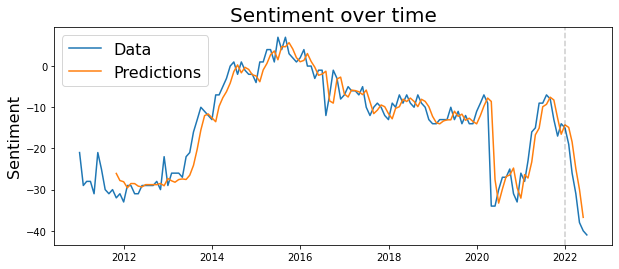

In [212]:
plt.figure(figsize=(10,4))
plt.plot(df_ar_pub)
plt.plot(predictions_rolling_pub)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Sentiment over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
for year in range(2022,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

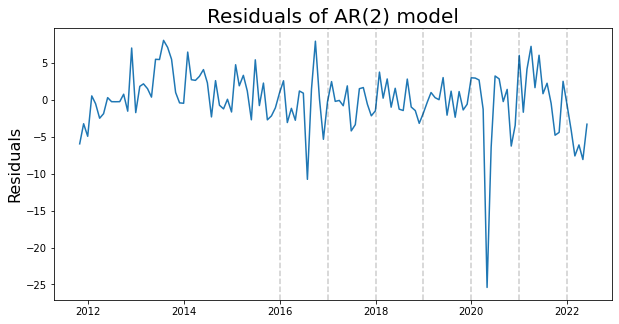

In [213]:
plt.figure(figsize=(10,5))
plt.plot(residuals_rolling_pub)
plt.title('Residuals of AR(2) model', fontsize=20)
plt.ylabel('Residuals', fontsize=16)
#plt.xlim([datetime.date(2015, 12, 31),datetime.date(2022, 12, 31)])
for year in range(2016,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [214]:
df_residuals = pd.DataFrame(columns=['senti', 'pub'])

In [215]:
df_residuals['senti'] = residuals_rolling_tw

In [216]:
df_residuals['pub'] = residuals_rolling_pub/10

In [217]:
df_residuals

,senti,pub
2010-12-31,NaN,NaN
2011-01-31,NaN,NaN
2011-02-28,NaN,NaN
2011-03-31,NaN,NaN
2011-04-30,NaN,NaN
...,...,...
2022-04-30,0.005691,-0.806037
2022-05-31,-0.035201,-0.326558
2022-06-30,-0.015138,NaN
2022-07-31,0.021281,NaN


<AxesSubplot:>

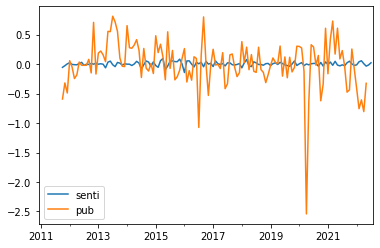

In [218]:
df_residuals.plot()

In [219]:
df_residuals.corr()

,senti,pub
senti,1.000000,-0.052084
pub,-0.052084,1.000000


In [220]:
df_ccf = df_residuals.dropna()

In [221]:
import statsmodels.api as sm

residuals_ccf = sm.tsa.stattools.ccf(df_ccf['senti'].array, df_ccf['pub'].array, adjusted =False)

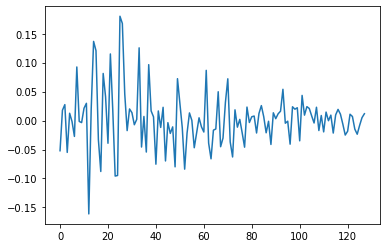

In [222]:
plt.plot(residuals_ccf)
plt.show()

In [223]:
original_ccf = sm.tsa.stattools.ccf(df_ar_senti.array, df_ar_pub.array, adjusted =False)

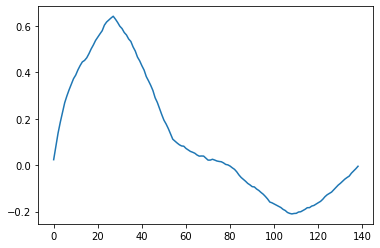

In [224]:
plt.plot(original_ccf)
plt.show()

In [225]:
from statsmodels.tsa.stattools import grangercausalitytests

gc_res = grangercausalitytests(df_ccf, 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0187  , p=0.8914  , df_denom=124, df_num=1
ssr based chi2 test:   chi2=0.0192  , p=0.8898  , df=1
likelihood ratio test: chi2=0.0192  , p=0.8898  , df=1
parameter F test:         F=0.0187  , p=0.8914  , df_denom=124, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0012  , p=0.9988  , df_denom=121, df_num=2
ssr based chi2 test:   chi2=0.0025  , p=0.9988  , df=2
likelihood ratio test: chi2=0.0025  , p=0.9988  , df=2
parameter F test:         F=0.0012  , p=0.9988  , df_denom=121, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1924  , p=0.9014  , df_denom=118, df_num=3
ssr based chi2 test:   chi2=0.6114  , p=0.8938  , df=3
likelihood ratio test: chi2=0.6099  , p=0.8942  , df=3
parameter F test:         F=0.1924  , p=0.9014  , df_denom=118, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1817  , p=0.9475  

In [226]:
df_ar = pd.DataFrame(columns=['senti', 'pub'])

In [227]:
df_ar['senti'] = df_ar_senti
df_ar['pub'] = df_ar_pub

In [228]:
df_ar = df_ar.dropna()

In [229]:
gc_res = grangercausalitytests(df_ar, 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7668  , p=0.3828  , df_denom=135, df_num=1
ssr based chi2 test:   chi2=0.7838  , p=0.3760  , df=1
likelihood ratio test: chi2=0.7816  , p=0.3767  , df=1
parameter F test:         F=0.7668  , p=0.3828  , df_denom=135, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1570  , p=0.1197  , df_denom=132, df_num=2
ssr based chi2 test:   chi2=4.4775  , p=0.1066  , df=2
likelihood ratio test: chi2=4.4059  , p=0.1105  , df=2
parameter F test:         F=2.1570  , p=0.1197  , df_denom=132, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0050  , p=0.1165  , df_denom=129, df_num=3
ssr based chi2 test:   chi2=6.3414  , p=0.0961  , df=3
likelihood ratio test: chi2=6.1980  , p=0.1024  , df=3
parameter F test:         F=2.0050  , p=0.1165  , df_denom=129, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.4447  , p=0.0104  

In [230]:
coint(df_ccf['senti'].array, df_ccf['pub'].array)

(-7.3343970768321745,
 1.343701245227486e-09,
 array([-3.98475411, -3.38466405, -3.07801392]))

In [231]:
#coint(df_ar_senti.array[:-2], df_ar_pub.array)

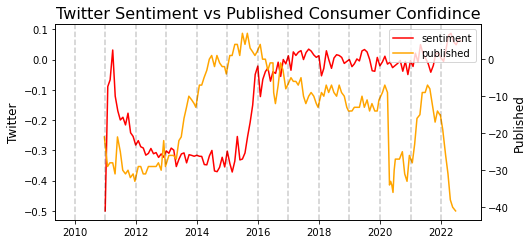

In [233]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

sentiment = df_senti_monthly.sentiment_score
published = date_pub_now.Actual

ax1 = plt.subplot()
l1, = ax1.plot(sentiment, color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(published, color='orange')
plt.title('Twitter Sentiment vs Published Consumer Confidince', fontsize=16)
plt.legend([l1, l2], ["sentiment", "published"])
ax1.set_ylabel('Twitter', fontsize=12)
ax2.set_ylabel('Published', fontsize=12)
for year in range(2010,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()

In [240]:
len(sentiment)

139

In [234]:
sentiment = sentiment.drop(labels=['2022-07-31', '2022-08-31'], axis=0)

ValueError: x and y must be the same size

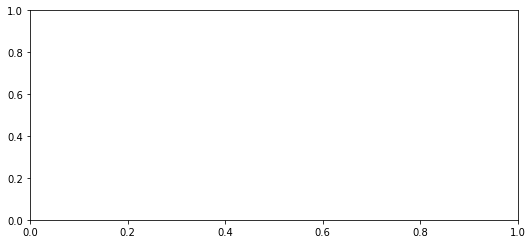

In [235]:
plt.scatter(sentiment, published)
plt.show()

In [236]:
np.corrcoef(sentiment.values, published.values)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 139 and the array at index 1 has size 146

In [ ]:
plt.scatter(df_senti_monthly.first_diff[:-2], date_pub_now.first_diffs)
plt.show()

In [ ]:
np.corrcoef(df_senti_monthly.first_diff[:-2], date_pub_now.first_diffs)